<a href="https://colab.research.google.com/github/adalbertii/Seci-konwolucyjne/blob/main/cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow import keras

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
print(x_train.min(), "-", x_train.max())

0 - 255


In [ ]:
x_train = (x_train / 255.0) - 0.5
x_test = (x_test / 255.0) - 0.5
print(x_train.min(), "-", x_train.max())

-0.5 - 0.5


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Convolution2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
model = Sequential([
   Convolution2D(filters=64, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'),
   Convolution2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Convolution2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
   Convolution2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Convolution2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
   Convolution2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
   Flatten(),
   Dense(units=512, activation="relu"),
   Dense(units=64, activation="relu"),
   Dense(units=10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                   

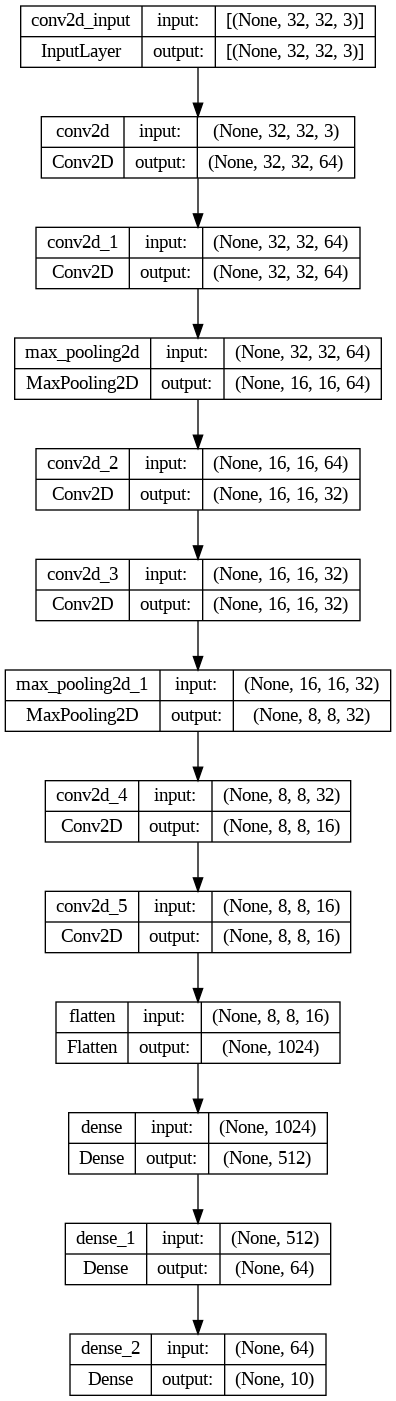

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model_info.png', show_shapes=True)

In [ ]:
optim = SGD(learning_rate=0.001, momentum=0.5)
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
   x_train,
   to_categorical(y_train),
   epochs=80,
   validation_split=0.15,
   verbose=1
)

Epoch 1/80
1329/1329 [==============================] - 230s 172ms/step - loss: 2.3002 - accuracy: 0.1311 - val_loss: 2.2970 - val_accuracy: 0.1292
Epoch 2/80
1329/1329 [==============================] - 224s 169ms/step - loss: 2.2876 - accuracy: 0.1630 - val_loss: 2.2678 - val_accuracy: 0.1851
Epoch 3/80
1329/1329 [==============================] - 224s 169ms/step - loss: 2.1295 - accuracy: 0.2329 - val_loss: 1.9598 - val_accuracy: 0.2900
Epoch 4/80
1329/1329 [==============================] - 226s 170ms/step - loss: 1.8794 - accuracy: 0.3178 - val_loss: 1.8066 - val_accuracy: 0.3441
Epoch 5/80
1329/1329 [==============================] - 225s 169ms/step - loss: 1.7410 - accuracy: 0.3652 - val_loss: 1.6960 - val_accuracy: 0.3811
Epoch 6/80
1329/1329 [==============================] - 227s 171ms/step - loss: 1.6443 - accuracy: 0.3983 - val_loss: 1.7234 - val_accuracy: 0.3748
Epoch 7/80
1329/1329 [==============================] - 230s 173ms/step - loss: 1.5762 - accuracy: 0.4234 - val_

In [ ]:
eval = model.evaluate(x_test, to_categorical(y_test))
eval

313/313 [==============================] - 14s 45ms/step - loss: 1.3149 - accuracy: 0.7044


[1.3148797750473022, 0.7044000029563904]

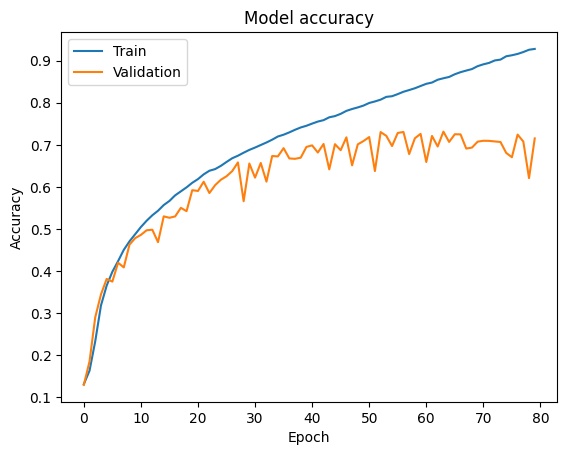

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**Optymalizacja architektury CNN**

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Convolution2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [ ]:

model = Sequential([
    Convolution2D(filters=128, kernel_size=(5,5), input_shape=(32,32,3), activation='relu', padding='same'),
    BatchNormalization(),
    Convolution2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D((2,2)),
    Convolution2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'),
    BatchNormalization(),
    Convolution2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D((2,2)),
    Convolution2D(filters=32, kernel_size=(5,5), activation='relu', padding='same'),
    BatchNormalization(),
    Convolution2D(filters=32, kernel_size=(5,5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D((2,2)),
    Convolution2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Convolution2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Flatten(),
    Dense(units=32, activation="relu"),
    Dropout(0.15),
    Dense(units=16, activation="relu"),
    Dropout(0.05),
    Dense(units=10, activation="softmax")
])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       9728      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       409728    
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 128)       512       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 128)       0         
 D)                                                              
                                                        

In [ ]:
optim = RMSprop(learning_rate=0.001)

In [ ]:
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

**Po uaktywnieniu procesora GPU**

In [ ]:
history = model.fit(
   x_train,
   to_categorical(y_train),
   epochs=80,
   validation_split=0.15,
   verbose=1
)

Epoch 1/80
1329/1329 [==============================] - 38s 19ms/step - loss: 1.7160 - accuracy: 0.3625 - val_loss: 1.4143 - val_accuracy: 0.4891
Epoch 2/80
1329/1329 [==============================] - 23s 17ms/step - loss: 1.2415 - accuracy: 0.5595 - val_loss: 1.0683 - val_accuracy: 0.6305
Epoch 3/80
1329/1329 [==============================] - 25s 19ms/step - loss: 0.9927 - accuracy: 0.6568 - val_loss: 0.9281 - val_accuracy: 0.6820
Epoch 4/80
1329/1329 [==============================] - 26s 20ms/step - loss: 0.8390 - accuracy: 0.7170 - val_loss: 0.7660 - val_accuracy: 0.7379
Epoch 5/80
1329/1329 [==============================] - 24s 18ms/step - loss: 0.7359 - accuracy: 0.7561 - val_loss: 0.8505 - val_accuracy: 0.7227
Epoch 6/80
1329/1329 [==============================] - 23s 17ms/step - loss: 0.6496 - accuracy: 0.7857 - val_loss: 0.7162 - val_accuracy: 0.7669
Epoch 7/80
1329/1329 [==============================] - 23s 17ms/step - loss: 0.5865 - accuracy: 0.8072 - val_loss: 0.7296 -

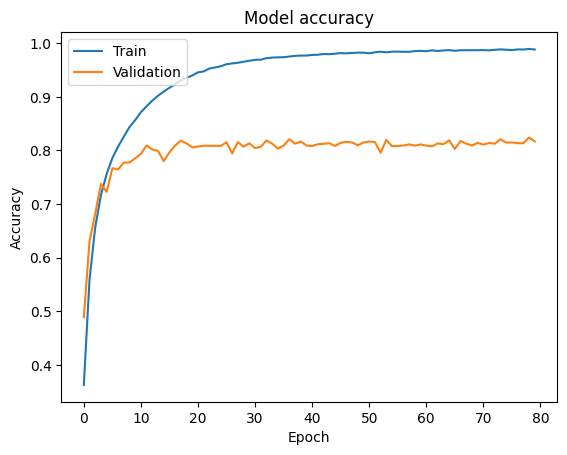

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Augmentation**

In [ ]:
model = Sequential([
   Convolution2D(filters=128, kernel_size=(5,5), input_shape=(32,32,3), activation='relu', padding='same'),
   BatchNormalization(),
   Convolution2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'),
   BatchNormalization(),
   MaxPool2D((2,2)),
   Convolution2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'),
   BatchNormalization(),
   Convolution2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'),
   BatchNormalization(),
   MaxPool2D((2,2)),
   Convolution2D(filters=32, kernel_size=(5,5), activation='relu', padding='same'),
   BatchNormalization(),
   Convolution2D(filters=32, kernel_size=(5,5), activation='relu', padding='same'),
   BatchNormalization(),
   MaxPool2D((2,2)),
   Convolution2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
   BatchNormalization(),
   Convolution2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
   BatchNormalization(),
   Flatten(),
   Dense(units=32, activation="relu"),
   Dropout(0.15),
   Dense(units=16, activation="relu"),
   Dropout(0.05),
   Dense(units=10, activation="softmax")
])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 128)       9728      
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 128)       512       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 128)       409728    
                                                                 
 batch_normalization_9 (Bat  (None, 32, 32, 128)       512       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                      

In [ ]:
optim = RMSprop(learning_rate=0.001)
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    vertical_flip = False,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale = 1. / 255,
    shear_range=0.05,
    zoom_range=0.05,
)


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

batch_size = 64
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)

In [ ]:
datagen_valid = ImageDataGenerator(
   rescale = 1. / 255,
)



In [ ]:
x_valid = x_train[:100*batch_size]
y_valid = y_train[:100*batch_size]

x_valid.shape[0]

6400

In [ ]:
valid_steps = x_valid.shape[0] // batch_size
validation_generator = datagen_valid.flow(x_valid, y_valid, batch_size=batch_size)

In [ ]:
history = model.fit(
   train_generator,
   steps_per_epoch=len(x_train) // batch_size,
   epochs=120,
   validation_data=validation_generator,
   validation_freq=1,
   validation_steps=valid_steps,
   verbose=2
)

Epoch 1/120
781/781 - 40s - loss: 0.4323 - accuracy: 0.8604 - val_loss: 0.3318 - val_accuracy: 0.8872 - 40s/epoch - 51ms/step
Epoch 2/120
781/781 - 40s - loss: 0.4220 - accuracy: 0.8620 - val_loss: 0.5089 - val_accuracy: 0.8461 - 40s/epoch - 51ms/step
Epoch 3/120
781/781 - 41s - loss: 0.4151 - accuracy: 0.8660 - val_loss: 0.3741 - val_accuracy: 0.8755 - 41s/epoch - 52ms/step
Epoch 4/120
781/781 - 40s - loss: 0.4048 - accuracy: 0.8681 - val_loss: 0.4907 - val_accuracy: 0.8372 - 40s/epoch - 51ms/step
Epoch 5/120
781/781 - 40s - loss: 0.3978 - accuracy: 0.8702 - val_loss: 0.3881 - val_accuracy: 0.8703 - 40s/epoch - 51ms/step
Epoch 6/120
781/781 - 40s - loss: 0.4003 - accuracy: 0.8701 - val_loss: 0.3195 - val_accuracy: 0.8959 - 40s/epoch - 52ms/step
Epoch 7/120
781/781 - 41s - loss: 0.3855 - accuracy: 0.8761 - val_loss: 0.3707 - val_accuracy: 0.8786 - 41s/epoch - 52ms/step
Epoch 8/120
781/781 - 40s - loss: 0.3831 - accuracy: 0.8777 - val_loss: 0.3212 - val_accuracy: 0.8931 - 40s/epoch - 51

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


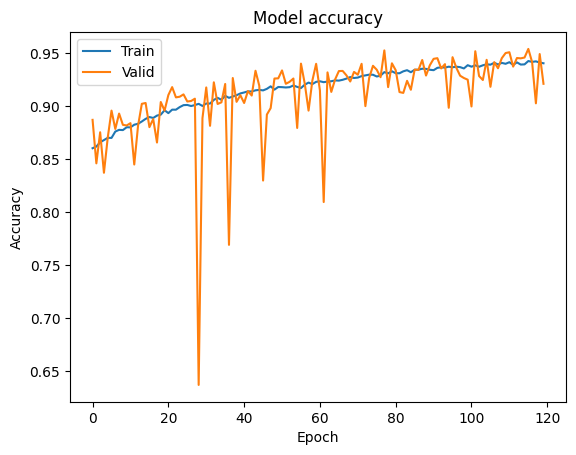

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

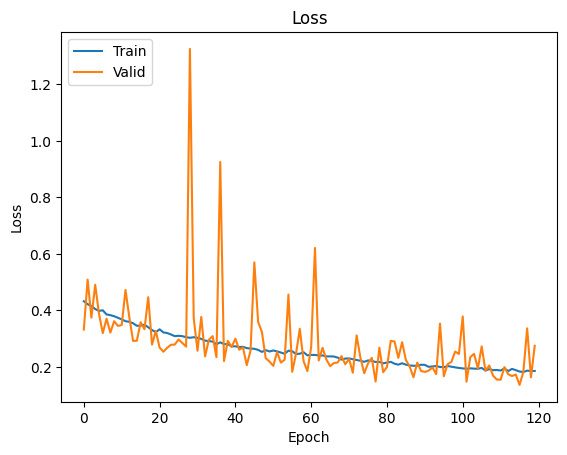

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [ ]:
x_final_test = x_test / 255.0
eval = model.evaluate(x_final_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.7156 - accuracy: 0.8464
